该数据源2018年在gitee被公开，是中国某500强企业在2013年电商交易的真实信息数据，数据中标注了异常订单，可以根据已有数据来预测订单是否为异常订单，来为企业的业务提供预警

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'abnormal_orders.txt')

In [3]:
data.head()

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [4]:
data.shape

(134190, 14)

In [5]:
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'abnormal_label'],
      dtype='object')

In [6]:
data.columns = ['订单ID','下单日期','下单时间','商品品类','渠道','商品ID','品牌','订单金额','销售数量','下单渠道','支付方式','用户ID','城市','异常标签']

In [7]:
data.head()

,订单ID,下单日期,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,异常标签
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134190 entries, 0 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    134190 non-null  int64  
 1   下单日期    134190 non-null  object 
 2   下单时间    134190 non-null  object 
 3   商品品类    132800 non-null  object 
 4   渠道      134190 non-null  object 
 5   商品ID    134190 non-null  int64  
 6   品牌      133418 non-null  object 
 7   订单金额    134189 non-null  float64
 8   销售数量    134190 non-null  int64  
 9   下单渠道    134190 non-null  object 
 10  支付方式    134190 non-null  object 
 11  用户ID    134190 non-null  object 
 12  城市      134188 non-null  object 
 13  异常标签    134190 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.3+ MB


In [13]:
data.isnull().sum()

订单ID       0
下单日期       0
下单时间       0
商品品类    1390
渠道         0
商品ID       0
品牌       772
订单金额       1
销售数量       0
下单渠道       0
支付方式       0
用户ID       0
城市         2
异常标签       0
dtype: int64

In [16]:
(data['异常标签'] ==1).sum()

28457

In [17]:
(data['异常标签'] ==1).sum() / data.shape[0]

0.2120649824875177

In [19]:
data['下单日期'].value_counts()

2013-10-31    690
2013-03-21    429
2013-11-01    426
2013-01-24    422
2013-03-23    416
             ... 
2013-07-31     17
2013-08-31     14
2013-01-31      2
2013-05-31      2
2013-03-31      2
Name: 下单日期, Length: 364, dtype: int64

In [20]:
data['订单ID'].duplicated().sum() #有重复订单（含义需探究）

19212

In [21]:
data['商品品类'].value_counts()

手机摄影数码       20612
生活电器厨卫电器     19281
家纺寝居         18679
电脑办公打印文仪     11405
家居日用         10642
电视冰箱洗衣机空调     9067
美妆个护          9043
汽车用品          6490
家具建材          4941
食品酒水          4669
健康医疗          4252
服饰鞋帽          4067
运动户外          3934
母婴用品玩具        2664
箱包奢品          1962
钟表首饰           860
图书音像           232
Name: 商品品类, dtype: int64

In [23]:
data['渠道'].value_counts() #pop(platform open plan) 即第三方商家， GO应为自营商家

GO     91170
POP    43020
Name: 渠道, dtype: int64

In [25]:
data['下单渠道'].value_counts()

主站            96894
抢购            16256
手机站点           7098
团购             6294
手机抢购           3095
do.site_id     2394
手机团购           1074
充值              703
当当              377
游戏站点              5
Name: 下单渠道, dtype: int64

In [26]:
data['支付方式'].value_counts()

合并支付    104274
货到付款     26785
当当支付      2511
在线支付       421
账户余额       199
Name: 支付方式, dtype: int64

In [27]:
data['城市'].value_counts()

北京市        14554
上海市         6637
广州市         6033
深圳市         5468
天津市         3393
           ...  
山西省其他城市        1
昌都地区           1
果洛州            1
云南省其他城市        1
山东省其他城市        1
Name: 城市, Length: 365, dtype: int64

# 特征工程

In [29]:
data.isnull().sum()

订单ID       0
下单日期       0
下单时间       0
商品品类    1390
渠道         0
商品ID       0
品牌       772
订单金额       1
销售数量       0
下单渠道       0
支付方式       0
用户ID       0
城市         2
异常标签       0
dtype: int64

In [30]:
data.loc[data['商品品类'].isnull(),'异常标签'].sum()

163

In [35]:
for i in ['商品品类','品牌']:
    ratio1 = 100*data.loc[data[i].isnull(),'异常标签'].sum() / data[i].isnull().sum()
    print('缺少（{}）的样本中异常样本的比例为{:.3f}%'.format(i,ratio1))

缺少（商品品类）的样本中异常样本的比例为11.727%
缺少（品牌）的样本中异常样本的比例为20.984%


In [38]:
data['异常标签'].sum() / data.shape[0]

0.2120649824875177

In [39]:
#缺失和异常关系不大

In [42]:
for i in ['商品品类','品牌']:
    ratio2 = 100*data.loc[data[i].isnull(),'异常标签'].sum() / (data['异常标签']==1).sum()
    print('缺少（{}）的异常样本占总异常样本的比例为{:.3f}%'.format(i,ratio2))

缺少（商品品类）的异常样本占总异常样本的比例为0.573%
缺少（品牌）的异常样本占总异常样本的比例为0.569%


In [43]:
#占比很小，可删

In [47]:
data = data.dropna()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132761 entries, 1 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    132761 non-null  int64  
 1   下单日期    132761 non-null  object 
 2   下单时间    132761 non-null  object 
 3   商品品类    132761 non-null  object 
 4   渠道      132761 non-null  object 
 5   商品ID    132761 non-null  int64  
 6   品牌      132761 non-null  object 
 7   订单金额    132761 non-null  float64
 8   销售数量    132761 non-null  int64  
 9   下单渠道    132761 non-null  object 
 10  支付方式    132761 non-null  object 
 11  用户ID    132761 non-null  object 
 12  城市      132761 non-null  object 
 13  异常标签    132761 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 15.2+ MB


In [49]:
data.index = range(data.shape[0])

In [50]:
data.shape

(132761, 14)

In [51]:
data.duplicated().sum()

8

In [52]:
data.drop_duplicates(inplace=True)

<ipython-input-52-515f69ef7765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [53]:
data.shape

(132753, 14)

In [59]:
data.index = range(data.shape[0])

In [54]:
data['订单ID'].duplicated().sum()

18546

In [55]:
data['订单ID'].value_counts()

4279118253    32
4269390206    23
4271884108    20
4275856215    20
4279551124    19
              ..
4197744419     1
4285399129     1
4276101928     1
4280584543     1
4272687103     1
Name: 订单ID, Length: 114207, dtype: int64

In [64]:
data[data['订单ID']==4269390206].head(10)

,订单ID,下单日期,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,异常标签
76914,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76915,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76916,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-05-03,02:11:10,生活电器厨卫电器,GO,1000320932,凯伍德,1690.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-05-02,02:11:10,家居日用,GO,1000336076,康宁,439.0,1,主站,合并支付,1390109546,西安市,0
76921,4269390206,2013-12-19,02:11:10,家居日用,GO,1000192284,国研联合,158.0,1,主站,合并支付,1390109546,西安市,0
76922,4269390206,2013-10-28,02:11:10,家居日用,GO,1000104751,苏泊尔,459.0,1,主站,合并支付,1390109546,西安市,0
76923,4269390206,2013-12-05,02:11:10,家居日用,GO,1000104746,苏泊尔,229.0,1,主站,合并支付,1390109546,西安市,0


In [61]:
data[data['订单ID'] == 4279118253].head(10)

,订单ID,下单日期,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,异常标签
95210,4279118253,2013-07-23,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95211,4279118253,2013-11-08,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95212,4279118253,2013-01-26,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95213,4279118253,2013-02-03,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95214,4279118253,2013-07-06,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95215,4279118253,2013-04-28,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95216,4279118253,2013-10-04,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95217,4279118253,2013-02-21,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95218,4279118253,2013-06-18,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95219,4279118253,2013-09-25,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0


#查看订单ID相同的两个样本，发现下单时间相同，其他条件也相同，但下单日期不同，这种数据不像真实发生的，说明某些数据有可能是捏造

In [83]:
data.loc[data['订单ID'] == 4279118253,'商品ID'].duplicated().sum()

27

In [86]:
data.loc[data['订单ID'] == 4269390206,'商品ID'].duplicated().sum()

0

In [87]:
#发现订单ID相同的单子中，有些有重复的商品ID，有些没有，可以暂时把重复商品ID的那些数据看成是伪造的

In [88]:
data2 = data.drop(columns='下单日期')

In [90]:
data2.duplicated().sum() #可能是伪造订单，数量不大可删

1471

In [91]:
data.drop(index=data[data2.duplicated()].index,inplace=True)

d:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
data

,订单ID,下单日期,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,异常标签
0,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,2013-03-13,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,2013-04-21,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132748,4285755067,2013-03-12,23:56:01,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,货到付款,yanshuo3,北京市,0
132749,4285755076,2013-01-23,23:57:24,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,货到付款,yanshuo3,北京市,0
132750,4285765029,2013-03-24,23:54:34,家具建材,GO,1000348294,埃斯兰德,128.0,1,抢购,合并支付,1350304234,广州市,0
132751,4285770012,2013-09-19,23:55:06,家居日用,GO,1000335947,炊大师,79.0,1,抢购,合并支付,shukun,东莞市,0


In [94]:
data.index = range(data.shape[0])

In [96]:
data['订单ID'].value_counts()

4269390206    23
4271884108    20
4275856215    20
4265415474    19
4283339603    18
              ..
4119457425     1
4285079183     1
4282726026     1
3670355593     1
4272687103     1
Name: 订单ID, Length: 114207, dtype: int64

In [98]:
label_1 = data.loc[data['异常标签']==1,'订单ID'].value_counts()
label_1

4275856215    20
4271884108    20
4193043860    16
4272902282    15
4263198458    14
              ..
4279211175     1
4284423334     1
4280539566     1
4275244196     1
4245325823     1
Name: 订单ID, Length: 25107, dtype: int64

In [99]:
df = pd.DataFrame()
for idx,i in enumerate(label_1.index):
    ratio = label_1[i] / data[data['订单ID']==i].shape[0]
    df.loc[idx,'订单ID']=i
    df.loc[idx,'异常样本在该ID中占比'] = ratio

In [102]:
df.iloc[:,1].value_counts() #绝大多数相同订单ID的标签是一致的

1.0    25102
0.5        5
Name: 异常样本在该ID中占比, dtype: int64

In [105]:
data['下单日期'].apply(lambda x:x[5:7]).value_counts()

10    11651
06    11201
09    11124
03    11113
07    11011
01    10959
04    10912
05    10888
12    10842
08    10837
11    10723
02    10021
Name: 下单日期, dtype: int64

In [106]:
#月份分布均匀，之前观看日期本就有问题，现在分布过于均匀，是人为篡改的可能性很大，不如直接删除

In [107]:
data.drop(columns='下单日期',inplace=True)
data

d:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,订单ID,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,异常标签
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131277,4285755067,23:56:01,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,货到付款,yanshuo3,北京市,0
131278,4285755076,23:57:24,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,货到付款,yanshuo3,北京市,0
131279,4285765029,23:54:34,家具建材,GO,1000348294,埃斯兰德,128.0,1,抢购,合并支付,1350304234,广州市,0
131280,4285770012,23:55:06,家居日用,GO,1000335947,炊大师,79.0,1,抢购,合并支付,shukun,东莞市,0


In [108]:
data.loc[:,['订单金额','销售数量']].describe()

,订单金额,销售数量
count,131282.000000,131282.000000
mean,667.187834,1.188975
std,2930.730828,1.684653
min,0.500000,1.000000
25%,29.000000,1.000000
50%,98.000000,1.000000
75%,379.000000,1.000000
max,766000.000000,200.000000


(array([1.31272e+05, 6.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([5.0000000e-01, 7.6600450e+04, 1.5320040e+05, 2.2980035e+05,
        3.0640030e+05, 3.8300025e+05, 4.5960020e+05, 5.3620015e+05,
        6.1280010e+05, 6.8940005e+05, 7.6600000e+05]),
 <BarContainer object of 10 artists>)

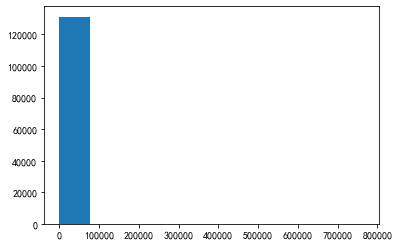

In [113]:
plt.hist(data.loc[:,'订单金额'])

<AxesSubplot:xlabel='订单金额', ylabel='Density'>

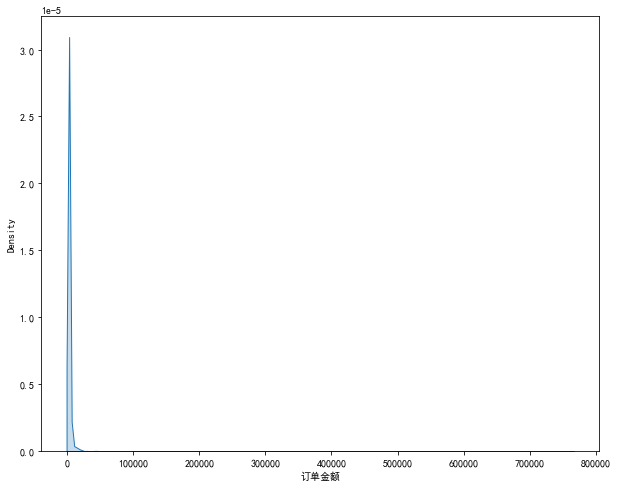

In [119]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.kdeplot(data.loc[:,'订单金额'],shade=True)

(array([1.31215e+05, 3.10000e+01, 2.20000e+01, 1.00000e+00, 1.20000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <BarContainer object of 10 artists>)

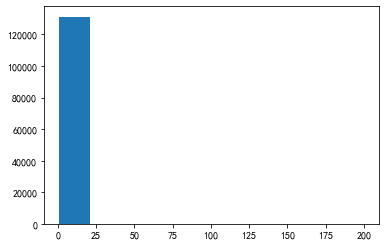

In [118]:
plt.hist(data.loc[:,'销售数量'])

<AxesSubplot:xlabel='销售数量', ylabel='Density'>

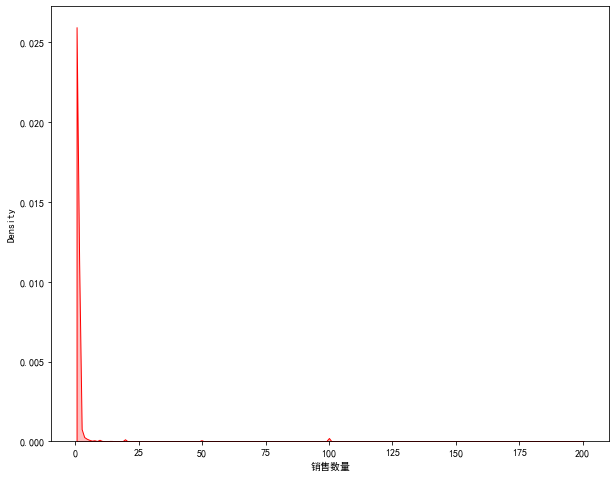

In [121]:
plt.figure(figsize=(10,8))
sns.kdeplot(data.loc[:,'销售数量'],shade=True,color='red')

In [122]:
#两个连续变量都严重左偏，异常值很多

In [145]:
abnormalidx = []

In [146]:
for idx,column in enumerate(['订单金额','销售数量']):
    feature = data.loc[:,column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL
    error = feature[((feature<(QL-1.5*IQR)).astype(int)+(feature>(QU+1.5*IQR)).astype(int))!=0]
    abnormalidx.extend(error.index)

In [148]:
len(abnormalidx)

31266

In [150]:
len(set(abnormalidx))

29949

In [151]:
abnormalidx = set(abnormalidx)

In [152]:
len(abnormalidx)/data.shape[0]

0.22812723754970216

In [153]:
df = pd.DataFrame(index=data.index)

In [155]:
df['特征异常'] = 0

In [157]:
df.loc[abnormalidx,'特征异常'] =1

In [159]:
pd.concat([df['特征异常'],data['异常标签']],axis=1).corr()

,特征异常,异常标签
特征异常,1.000000,0.040428
异常标签,0.040428,1.000000


In [160]:
#几乎不存在任何关系

In [161]:
data.to_csv('temp1.csv')

# 建立benchmark

In [163]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier as RFC

In [167]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [168]:
X['下单时间'] = X['下单时间'].apply(lambda x:x[:2])

In [169]:
X.head()

,订单ID,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市
0,4283851335,14,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市
1,4276537082,14,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市
2,4281111595,10,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
3,3977175284,23,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市
4,4106833871,16,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市


In [170]:
oe = OrdinalEncoder()

In [173]:
X = pd.DataFrame(oe.fit_transform(X))

In [176]:
data.columns[:-1]

Index(['订单ID', '下单时间', '商品品类', '渠道', '商品ID', '品牌', '订单金额', '销售数量', '下单渠道',
       '支付方式', '用户ID', '城市'],
      dtype='object')

In [178]:
X.columns = data.columns[:-1]

In [179]:
X

,订单ID,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市
0,99753.0,14.0,5.0,1.0,15907.0,227.0,3009.0,41.0,1.0,0.0,24870.0,5.0
1,56307.0,14.0,11.0,1.0,15431.0,1551.0,2970.0,40.0,1.0,0.0,50713.0,207.0
2,81338.0,10.0,2.0,1.0,18402.0,2049.0,621.0,40.0,1.0,0.0,46259.0,133.0
3,7028.0,23.0,5.0,1.0,19080.0,377.0,1499.0,40.0,1.0,0.0,62154.0,101.0
4,11982.0,16.0,3.0,1.0,18580.0,748.0,2799.0,40.0,1.0,0.0,56469.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131277,114202.0,23.0,11.0,0.0,4109.0,626.0,2128.0,0.0,1.0,4.0,71827.0,50.0
131278,114203.0,23.0,11.0,0.0,4111.0,2363.0,2107.0,0.0,1.0,4.0,71827.0,50.0
131279,114204.0,23.0,2.0,0.0,5964.0,803.0,705.0,0.0,7.0,0.0,2917.0,133.0
131280,114205.0,23.0,3.0,0.0,5318.0,1760.0,533.0,0.0,7.0,0.0,60089.0,8.0


In [180]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=717)

In [181]:
cv = KFold(n_splits=5,shuffle=True,random_state=717)

In [182]:
clf = RFC(n_estimators=200,random_state=717)

In [184]:
acc = cross_val_score(clf,Xtrain,ytrain,cv=cv)

In [185]:
acc.mean()

0.8269258374969162

In [186]:
acc.var()

7.959633053639215e-06

In [187]:
auc = cross_val_score(clf,Xtrain,ytrain,cv=cv,scoring='roc_auc')

In [188]:
auc.mean()

0.8527826671496099

In [189]:
auc.var()

1.8180796014908765e-05

# 特征工程

In [ ]:
#分割测试集训练集，要保证同样订单ID的样本在同一个子集中

In [190]:
orderid = data['订单ID'].unique()

In [191]:
len(orderid)

114207

In [194]:
orderid

array([4283851335, 4276537082, 4281111595, ..., 4285765029, 4285770012,
       4285770056], dtype=int64)

In [196]:
import random
random.seed(717)
test_id = random.sample(orderid.tolist(),int(len(orderid)*0.3))

train_id = orderid.copy().tolist()
for i in test_id:
    train_id.remove(i)

In [198]:
print(len(test_id))
print(len(train_id))

34262
79945


In [199]:
data['分割'] = 'train'
for i in test_id:
    data.loc[data['订单ID']==i,'分割'] = 'test'

In [200]:
train = data.loc[data['分割'] == 'train',:]
test = data.loc[data['分割'] == 'test',:]

In [203]:
print(train.shape)
print(test.shape)

(91893, 14)
(39389, 14)


In [208]:
for i in [train,test]:
    i.index = range(i.shape[0])
    i.drop(columns='分割',inplace=True)

In [209]:
train.shape

(91893, 13)

In [212]:
train.head()

,订单ID,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,异常标签
0,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
1,4245023523,10:39:56,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,0
2,4276537218,16:03:52,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,合并支付,qq-3be293b,泉州市,0
3,4281111696,10:49:28,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,0
4,4284289174,16:48:06,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0


In [213]:
Xtrain = train.iloc[:,:-1]
Xtest = test.iloc[:,:-1]
ytrain = train.iloc[:,-1]
ytest = test.iloc[:,-1]

In [214]:
train = pd.concat([ytrain,Xtrain],axis=1)
test = pd.concat([ytest,Xtest],axis=1)

In [216]:
train.head()

,异常标签,订单ID,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市
0,1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市
1,0,4245023523,10:39:56,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
2,0,4276537218,16:03:52,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,合并支付,qq-3be293b,泉州市
3,0,4281111696,10:49:28,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
4,0,4284289174,16:48:06,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市


In [218]:
train.to_csv('train1.csv')
test.to_csv('test1.csv')

In [219]:
train = pd.read_csv(r'train1.csv',index_col=0)
test = pd.read_csv(r'test1.csv',index_col=0)

In [221]:
import time
import datetime

In [230]:
hour = train.loc[:,'下单时间'].apply(lambda x:int(x[:2]))
hour

0        14
1        10
2        16
3        10
4        16
         ..
91888    23
91889    23
91890    23
91891    23
91892    23
Name: 下单时间, Length: 91893, dtype: int64

In [234]:
ordertime_ab = hour[train['异常标签']==1].value_counts()
ordertime_normal = hour[train['异常标签']==0].value_counts()

In [236]:
ordertime_ab

21    1589
20    1546
10    1383
9     1350
22    1304
11    1276
12    1056
23    1047
8     1009
13     998
16     986
15     946
19     932
14     877
18     833
0      790
17     767
1      354
7      265
2      189
6      158
3      103
5       94
4       75
Name: 下单时间, dtype: int64

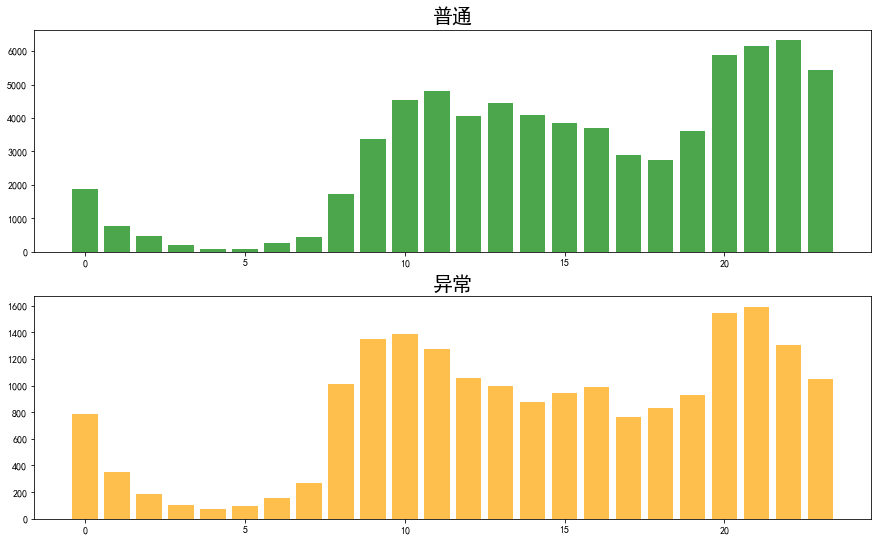

In [250]:
plt.figure(figsize=(15,9))

plt.subplot(211)
plt.bar(ordertime_normal.index,ordertime_normal.values,color='green',alpha=0.7)
plt.title('普通',fontsize=20)

plt.subplot(212)
plt.bar(ordertime_ab.index,ordertime_ab.values,color='orange',alpha=0.7)
plt.title('异常',fontsize=20)

plt.show()

#走势几乎相同,下单时间和是否异常应该无关。由于特征较少，还是把小时和分钟提取出来作为特征。小时按24小时计算，分钟做出两个特征，第一个特征：分钟按前半小时后半小时做成二分类，第二个特征：分钟把每小时前十分钟后十分钟作为一类，剩下四十分钟作为一类，这是根据先验经验猜测到整点附近可能会有满减等活动，下单会增加。

In [254]:
def encodeM1(column,train,test,newcolumn='下单分钟1'):
    dic = {}
    feature = train.loc[:,column].apply(lambda x:(int(x[3:5])>30))
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
        
    train[newcolumn] = feature
    train[newcolumn] = train[newcolumn].map(dic)
    
    test[newcolumn] = test.loc[:,column].apply(lambda x: (int(x[3:5])>30))
    test[newcolumn] = test[newcolumn].map(dic)
    
    return train,test

In [255]:
def encodeM2(column,train,test,newcolumn='下单分钟2'):
    dic = {}
    feature = train.loc[:,column].apply(lambda x:(int(x[3:5])<10 or int(x[3:5])>50))
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
        
    train[newcolumn] = feature
    train[newcolumn] = train[newcolumn].map(dic)
    
    test[newcolumn] = test.loc[:,column].apply(lambda x: (int(x[3:5])<10 or int(x[3:5])>50))
    test[newcolumn] = test[newcolumn].map(dic)
    
    return train,test

In [257]:
def encodeH(column,train,test,newcolumn='下单小时'):
    dic = {}
    feature = train.loc[:,column].apply(lambda x:(int(x[:2])))
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
        
    train[newcolumn] = feature
    train[newcolumn] = train[newcolumn].map(dic)
    
    test[newcolumn] = test.loc[:,column].apply(lambda x: (int(x[:2])))
    test[newcolumn] = test[newcolumn].map(dic)
    
    return train,test

In [260]:
encodeM1('下单时间',train,test)
encodeM2('下单时间',train,test)
encodeH('下单时间',train,test)

(       异常标签        订单ID      下单时间       商品品类   渠道        商品ID    品牌     订单金额  \
 0         1  4276537082  14:16:47  电视冰箱洗衣机空调  POP  8001992420    樱花  19900.0   
 1         0  4245023523  10:39:56       家具建材  POP  8002199518  纬度空间    100.0   
 2         0  4276537218  16:03:52  电视冰箱洗衣机空调  POP  8001992420    樱花  18900.0   
 3         0  4281111696  10:49:28       家具建材  POP  8002199518  纬度空间    100.0   
 4         0  4284289174  16:48:06       家居日用  POP  8002212182  品道天元   8800.0   
 ...     ...         ...       ...        ...  ...         ...   ...      ...   
 91888     0  4285745040  23:49:55       家纺寝居   GO  1000379206    逸驰     19.9   
 91889     0  4285745071  23:50:01   生活电器厨卫电器   GO  1000380943    捷赛    398.0   
 91890     0  4285765029  23:54:34       家具建材   GO  1000348294  埃斯兰德    128.0   
 91891     0  4285770012  23:55:06       家居日用   GO  1000335947   炊大师     79.0   
 91892     0  4285770056  23:58:59   生活电器厨卫电器   GO  1000009280    海尔    799.0   
 
        销售数量 下单渠道  支付方式   

In [263]:
test.head()

,异常标签,订单ID,下单时间,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,下单分钟1,下单分钟2,下单小时
0,1,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,0,1,14
1,1,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,0,10
2,0,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0,0,23
3,0,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,1,0,16
4,0,4253622967,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,0,0,21


In [264]:
train = train.drop(columns='下单时间')
test = test.drop(columns='下单时间')

In [266]:
train.to_csv(r'train2.csv')
test.to_csv(r'test2.csv')

In [ ]:
#支付方式

In [267]:
train['支付方式'].value_counts()

合并支付    72001
货到付款    18260
当当支付     1209
在线支付      313
账户余额      110
Name: 支付方式, dtype: int64

In [269]:
train.groupby('支付方式')['异常标签'].mean()

支付方式
合并支付    0.274871
在线支付    0.226837
当当支付    0.049628
账户余额    0.045455
货到付款    0.000000
Name: 异常标签, dtype: float64

In [270]:
def groupbyfeature(column,train,test,newcolumn):
    dic = dict(train.groupby(column)['异常标签'].mean())
    
    train[newcolumn] = train[column].map(dic)
    test[newcolumn] = test[column].map(dic)
    
    return train, test

In [271]:
train,test = groupbyfeature('支付方式',train,test,'支付方式异常率')

In [272]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,下单分钟1,下单分钟2,下单小时,支付方式异常率
0,1,4276537082,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,0,0,14,0.274871
1,0,4245023523,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,0,10,0.274871
2,0,4276537218,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,合并支付,qq-3be293b,泉州市,0,1,16,0.274871
3,0,4281111696,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1,0,10,0.274871
4,0,4284289174,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,1,0,16,0.274871


In [273]:
def encodePay(column,train,test):
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    train[column] = train[column].map(dic)
    test[column] = test[column].map(dic)
    
    return train,test

In [274]:
train,test = encodePay('支付方式',train,test)

In [276]:
train['支付方式'].value_counts()

0    72001
4    18260
2     1209
1      313
3      110
Name: 支付方式, dtype: int64

In [277]:
#城市

In [278]:
train['城市'].value_counts()

北京市        9535
上海市        4508
广州市        4132
深圳市        3700
天津市        2302
           ... 
昌都地区          1
山西省其他城市       1
四川省其他城市       1
福建省其他城市       1
山南地区          1
Name: 城市, Length: 364, dtype: int64

In [279]:
chinacity = pd.read_excel('ChinaCity.xls',index_col=1)

In [280]:
chinacity

,省份
市级,
北京市,北京市
天津市,天津市
石家庄市,河北省
唐山市,河北省
秦皇岛市,河北省
...,...
辽宁省其他城市,辽宁省
四川省其他城市,四川省
广东省其他城市,广东省


In [282]:
dict(chinacity['省份'])

{'北京市': '北京市',
 '天津市': '天津市',
 '石家庄市': '河北省',
 '唐山市': '河北省',
 '秦皇岛市': '河北省',
 '邯郸市': '河北省',
 '邢台市': '河北省',
 '保定市': '河北省',
 '张家口市': '河北省',
 '承德市': '河北省',
 '沧州市': '河北省',
 '廊坊市': '河北省',
 '衡水市': '河北省',
 '太原市': '山西省',
 '大同市': '山西省',
 '阳泉市': '山西省',
 '长治市': '山西省',
 '晋城市': '山西省',
 '朔州市': '山西省',
 '忻州市': '山西省',
 '吕梁市': '山西省',
 '晋中市': '山西省',
 '临汾市': '山西省',
 '运城市': '山西省',
 '呼和浩特市': '内蒙古自治区',
 '包头市': '内蒙古自治区',
 '乌海市': '内蒙古自治区',
 '赤峰市': '内蒙古自治区',
 '呼伦贝尔市': '内蒙古自治区',
 '兴安盟': '内蒙古自治区',
 '通辽市': '内蒙古自治区',
 '锡林郭勒盟': '内蒙古自治区',
 '乌兰察布市': '内蒙古自治区',
 '鄂尔多斯市': '内蒙古自治区',
 '巴彦淖尔市': '内蒙古自治区',
 '阿拉善盟': '内蒙古自治区',
 '沈阳市': '辽宁省',
 '大连市': '辽宁省',
 '鞍山市': '辽宁省',
 '抚顺市': '辽宁省',
 '本溪市': '辽宁省',
 '丹东市': '辽宁省',
 '锦州市': '辽宁省',
 '营口市': '辽宁省',
 '阜新市': '辽宁省',
 '辽阳市': '辽宁省',
 '盘锦市': '辽宁省',
 '铁岭市': '辽宁省',
 '朝阳市': '辽宁省',
 '葫芦岛市': '辽宁省',
 '长春市': '吉林省',
 '吉林市': '吉林省',
 '四平市': '吉林省',
 '辽源市': '吉林省',
 '通化市': '吉林省',
 '白山市': '吉林省',
 '松原市': '吉林省',
 '白城市': '吉林省',
 '延边州': '吉林省',
 '哈尔滨市': '黑龙江省',
 '齐齐哈尔市': '黑龙江省',
 '鸡西市': '黑龙江省',
 '鹤岗市': '黑龙

In [283]:
train['省份'] = train['城市'].map(dict(chinacity['省份']))

In [285]:
train['省份'].isnull().sum()

3

In [286]:
train[train['省份'].isnull()]

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,下单分钟1,下单分钟2,下单小时,支付方式异常率,省份
22163,1,4282946649,手机摄影数码,GO,1000376628,斐讯,399.0,1,主站,0,aiai131452,山西省其他城市,1,0,7,0.274871,NaN
27481,0,3809475249,母婴用品玩具,POP,8001276188,大贸商,109.0,1,主站,0,guoqingas,山东省其他城市,1,1,10,0.274871,NaN
83213,0,4283977714,生活电器厨卫电器,GO,1000006426,飞利浦,299.0,1,主站,4,1587002842,江西省其他城市,1,1,13,0.000000,NaN


In [288]:
dic_city = dict(chinacity['省份'])

In [289]:
dic_city['山西省其他城市'] = '山西省'
dic_city['山东省其他城市'] = '山东省'
dic_city['江西省其他城市'] = '江西省'

In [290]:
dic_city

{'北京市': '北京市',
 '天津市': '天津市',
 '石家庄市': '河北省',
 '唐山市': '河北省',
 '秦皇岛市': '河北省',
 '邯郸市': '河北省',
 '邢台市': '河北省',
 '保定市': '河北省',
 '张家口市': '河北省',
 '承德市': '河北省',
 '沧州市': '河北省',
 '廊坊市': '河北省',
 '衡水市': '河北省',
 '太原市': '山西省',
 '大同市': '山西省',
 '阳泉市': '山西省',
 '长治市': '山西省',
 '晋城市': '山西省',
 '朔州市': '山西省',
 '忻州市': '山西省',
 '吕梁市': '山西省',
 '晋中市': '山西省',
 '临汾市': '山西省',
 '运城市': '山西省',
 '呼和浩特市': '内蒙古自治区',
 '包头市': '内蒙古自治区',
 '乌海市': '内蒙古自治区',
 '赤峰市': '内蒙古自治区',
 '呼伦贝尔市': '内蒙古自治区',
 '兴安盟': '内蒙古自治区',
 '通辽市': '内蒙古自治区',
 '锡林郭勒盟': '内蒙古自治区',
 '乌兰察布市': '内蒙古自治区',
 '鄂尔多斯市': '内蒙古自治区',
 '巴彦淖尔市': '内蒙古自治区',
 '阿拉善盟': '内蒙古自治区',
 '沈阳市': '辽宁省',
 '大连市': '辽宁省',
 '鞍山市': '辽宁省',
 '抚顺市': '辽宁省',
 '本溪市': '辽宁省',
 '丹东市': '辽宁省',
 '锦州市': '辽宁省',
 '营口市': '辽宁省',
 '阜新市': '辽宁省',
 '辽阳市': '辽宁省',
 '盘锦市': '辽宁省',
 '铁岭市': '辽宁省',
 '朝阳市': '辽宁省',
 '葫芦岛市': '辽宁省',
 '长春市': '吉林省',
 '吉林市': '吉林省',
 '四平市': '吉林省',
 '辽源市': '吉林省',
 '通化市': '吉林省',
 '白山市': '吉林省',
 '松原市': '吉林省',
 '白城市': '吉林省',
 '延边州': '吉林省',
 '哈尔滨市': '黑龙江省',
 '齐齐哈尔市': '黑龙江省',
 '鸡西市': '黑龙江省',
 '鹤岗市': '黑龙

In [291]:
train['省份'] = train['城市'].map(dic_city)

In [292]:
train['省份'].isnull().sum()

0

In [293]:
test['省份'] = test['城市'].map(dic_city)

In [296]:
test['省份'].isnull().sum()

0

In [301]:
train.groupby(['省份'])['异常标签'].mean().sort_values(ascending=False)

省份
青海省         0.461538
西藏自治区       0.343750
内蒙古自治区      0.289195
海南省         0.271540
江西省         0.263538
甘肃省         0.262554
宁夏回族自治区     0.255208
山西省         0.253464
北京市         0.244468
河北省         0.244307
陕西省         0.238112
重庆市         0.235083
浙江省         0.230228
新疆维吾尔自治区    0.223770
天津市         0.223284
吉林省         0.223097
广东省         0.220235
辽宁省         0.215836
河南省         0.215115
湖南省         0.214548
福建省         0.210600
云南省         0.209939
湖北省         0.208898
山东省         0.208412
江苏省         0.206419
广西壮族自治区     0.205942
上海市         0.204082
四川省         0.197824
黑龙江省        0.185917
安徽省         0.160619
贵州省         0.070316
Name: 异常标签, dtype: float64

In [302]:
df = train.groupby(['省份'])['异常标签'].mean().sort_values(ascending=False)

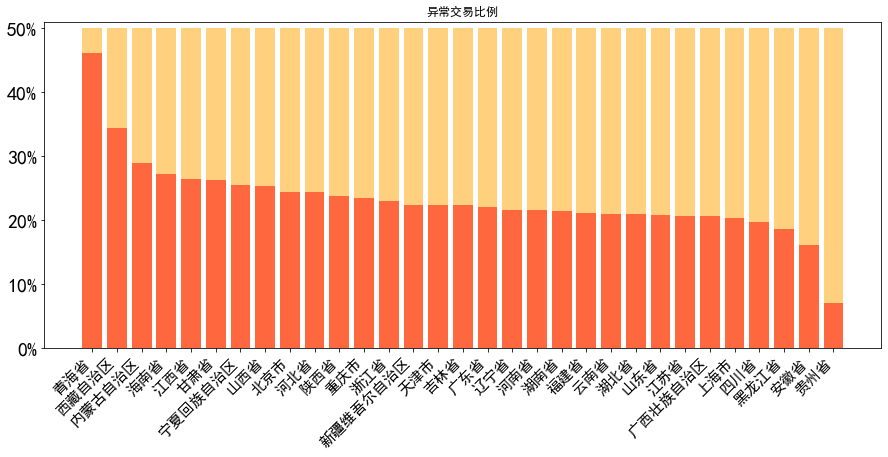

In [319]:
plt.figure(figsize=(15,6))

plt.bar(df.index,0.5,color='orange',alpha=0.5)
plt.bar(df.index,df.values,color='red',alpha=0.5)

plt.title('异常交易比例')
plt.ylim(0,0.51)
plt.yticks(ticks = np.arange(0,0.6,step=0.1),labels = ['0%','10%','20%','30%','40%','50%'],fontsize=20)

plt.xticks(range(len(df)),df.index,fontsize=15,rotation=45,ha='right')
plt.show()

In [320]:
def groupbyfeature(column,train,test,newcolumn):
    dic = dict(train.groupby(column)['异常标签'].mean())
    
    train[newcolumn] = train[column].map(dic)
    test[newcolumn] = test[column].map(dic)
    
    return train, test

In [321]:
train , test = groupbyfeature('省份',train,test,'省份异常率')

In [322]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,下单分钟1,下单分钟2,下单小时,支付方式异常率,省份,省份异常率
0,1,4276537082,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,qq-3be293b,泉州市,0,0,14,0.274871,福建省,0.210600
1,0,4245023523,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,1,0,10,0.274871,广东省,0.220235
2,0,4276537218,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,0,qq-3be293b,泉州市,0,1,16,0.274871,福建省,0.210600
3,0,4281111696,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,1,0,10,0.274871,广东省,0.220235
4,0,4284289174,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,深圳市,1,0,16,0.274871,广东省,0.220235


In [324]:
def encodeCityProvince(column,train,test):
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    train[column] = train[column].map(dic)
    test[column] = test[column].map(dic)
    
    return train,test

In [325]:
for column in ['城市','省份']:
    train, test = encodeCityProvince(column,train,test)

In [326]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,下单分钟1,下单分钟2,下单小时,支付方式异常率,省份,省份异常率
0,1,4276537082,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,qq-3be293b,206,0,0,14,0.274871,23,0.210600
1,0,4245023523,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,133,1,0,10,0.274871,11,0.220235
2,0,4276537218,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,0,qq-3be293b,206,0,1,16,0.274871,23,0.210600
3,0,4281111696,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,133,1,0,10,0.274871,11,0.220235
4,0,4284289174,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,222,1,0,16,0.274871,11,0.220235


In [334]:
test.isnull().sum()

异常标签       0
订单ID       0
商品品类       0
渠道         0
商品ID       0
品牌         0
订单金额       0
销售数量       0
下单渠道       0
支付方式       0
用户ID       0
城市         1
下单分钟1      0
下单分钟2      0
下单小时       0
支付方式异常率    0
省份         0
省份异常率      0
dtype: int64

In [332]:
test[test['城市'].isnull()]

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,用户ID,城市,下单分钟1,下单分钟2,下单小时,支付方式异常率,省份,省份异常率
7604,1,4280260346,箱包奢品,POP,8002266263,鳄鱼恤,149.0,1,抢购,0,qq-18cbe2f,NaN,1,0,21,0.274871,29,0.461538


In [344]:
train['城市'].value_counts()

50     9535
5      4508
133    4132
222    3700
95     2302
       ... 
87        1
26        1
261       1
168       1
117       1
Name: 城市, Length: 364, dtype: int64

In [343]:
(train['城市'].value_counts().index == 364).sum()

0

In [346]:
test.loc[test['城市'].isnull(),'城市'] = 364

In [347]:
test.isnull().sum()

异常标签       0
订单ID       0
商品品类       0
渠道         0
商品ID       0
品牌         0
订单金额       0
销售数量       0
下单渠道       0
支付方式       0
用户ID       0
城市         0
下单分钟1      0
下单分钟2      0
下单小时       0
支付方式异常率    0
省份         0
省份异常率      0
dtype: int64

In [348]:
train.to_csv(r'train3.csv')
test.to_csv(r'test3.csv')

In [350]:
train.groupby('商品品类')['异常标签'].mean()

商品品类
健康医疗         0.241333
图书音像         0.288732
家具建材         0.253153
家居日用         0.234682
家纺寝居         0.174485
手机摄影数码       0.259405
服饰鞋帽         0.274377
母婴用品玩具       0.173319
汽车用品         0.218162
生活电器厨卫电器     0.197497
电脑办公打印文仪     0.217857
电视冰箱洗衣机空调    0.196977
箱包奢品         0.350328
美妆个护         0.153241
运动户外         0.239437
钟表首饰         0.348639
食品酒水         0.199382
Name: 异常标签, dtype: float64

In [351]:
df = train.groupby('商品品类')['异常标签'].mean().sort_values()

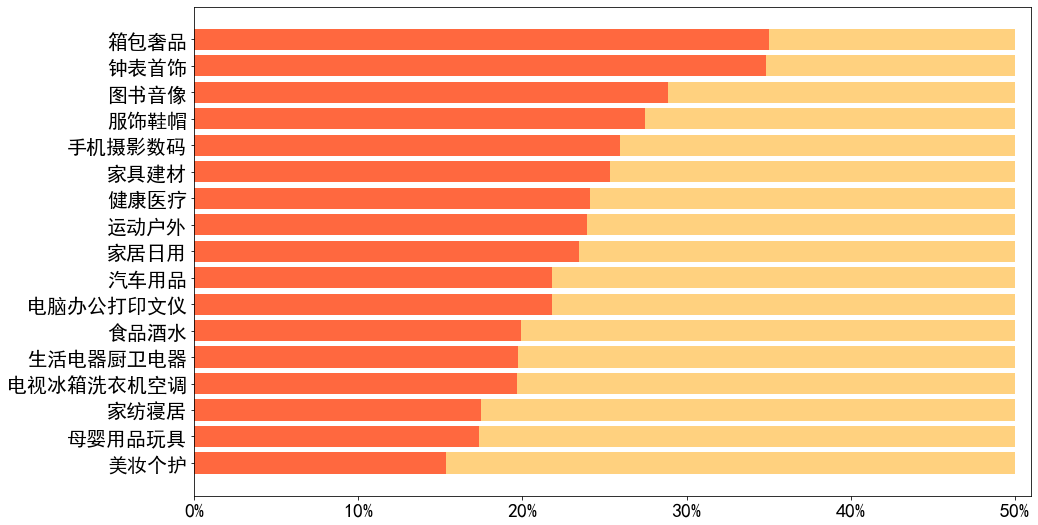

In [357]:
plt.figure(figsize=(15,9))

plt.barh(df.index,0.5,color='orange',alpha=0.5)
plt.barh(df.index,df.values,color='red',alpha=0.5)
plt.xlim(0,0.51)
plt.xticks(ticks = np.arange(0,0.6,step=0.1),labels = ['0%','10%','20%','30%','40%','50%'],fontsize=20)
plt.yticks(range(len(df)),df.index,fontsize=20)
plt.show()

In [360]:
train.groupby('下单渠道')['异常标签'].mean().sort_values()

下单渠道
do.site_id    0.099874
主站            0.168077
当当            0.234375
手机站点          0.282855
手机抢购          0.336215
团购            0.340213
抢购            0.398844
手机团购          0.509115
Name: 异常标签, dtype: float64

In [361]:
train.groupby('渠道')['异常标签'].mean()

渠道
GO     0.178876
POP    0.294674
Name: 异常标签, dtype: float64

In [364]:
train['品牌'].nunique()

2541

In [366]:
for i in ['商品品类','渠道','下单渠道']:
    train, test = groupbyfeature(i,train,test,i+'异常率')

In [368]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,...,城市,下单分钟1,下单分钟2,下单小时,支付方式异常率,省份,省份异常率,商品品类异常率,渠道异常率,下单渠道异常率
0,1,4276537082,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,...,206,0,0,14,0.274871,23,0.210600,0.196977,0.294674,0.168077
1,0,4245023523,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,...,133,1,0,10,0.274871,11,0.220235,0.253153,0.294674,0.168077
2,0,4276537218,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,0,...,206,0,1,16,0.274871,23,0.210600,0.196977,0.294674,0.168077
3,0,4281111696,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,...,133,1,0,10,0.274871,11,0.220235,0.253153,0.294674,0.168077
4,0,4284289174,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,...,222,1,0,16,0.274871,11,0.220235,0.234682,0.294674,0.168077


In [369]:
def encode(column,train,test):
    
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code, category in enumerate(unique_):
        dic[category] = code
        
    train[column] = train[column].map(dic)
    test[column] = test[column].map(dic)
    
    return train,test

In [370]:
for i in ['商品品类','渠道','下单渠道']:
    train, test = encode(i,train,test)

In [371]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,...,城市,下单分钟1,下单分钟2,下单小时,支付方式异常率,省份,省份异常率,商品品类异常率,渠道异常率,下单渠道异常率
0,1,4276537082,11,1,8001992420,樱花,19900.0,100,1,0,...,206,0,0,14,0.274871,23,0.210600,0.196977,0.294674,0.168077
1,0,4245023523,2,1,8002199518,纬度空间,100.0,100,1,0,...,133,1,0,10,0.274871,11,0.220235,0.253153,0.294674,0.168077
2,0,4276537218,11,1,8001992420,樱花,18900.0,100,1,0,...,206,0,1,16,0.274871,23,0.210600,0.196977,0.294674,0.168077
3,0,4281111696,2,1,8002199518,纬度空间,100.0,100,1,0,...,133,1,0,10,0.274871,11,0.220235,0.253153,0.294674,0.168077
4,0,4284289174,3,1,8002212182,品道天元,8800.0,100,1,0,...,222,1,0,16,0.274871,11,0.220235,0.234682,0.294674,0.168077


In [372]:
#处理多类别订单（用户ID，商品ID，品牌）

In [374]:
train['用户ID'].nunique()

58436

In [379]:
(train.groupby(['用户ID'])['异常标签'].count()==1).sum() #大部分人只下了一单

44053

In [386]:
multipleratio = train.groupby(['用户ID'])['异常标签'].mean()[train.groupby(['用户ID'])['异常标签'].count()!=1].sort_values()

In [388]:
multipleratio.describe([0.6,0.7,0.8,0.9])

count    14383.000000
mean         0.259337
std          0.346433
min          0.000000
50%          0.000000
60%          0.250000
70%          0.500000
80%          0.500000
90%          1.000000
max          1.000000
Name: 异常标签, dtype: float64

In [389]:
train.groupby(['商品ID'])['销售数量'].sum().describe()

count    17257.000000
mean         6.306368
std         38.061768
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2579.000000
Name: 销售数量, dtype: float64

In [391]:
proidratio = train.groupby(['商品ID'])['异常标签'].mean()[train.groupby(['商品ID'])['销售数量'].sum()>=10]

In [ ]:
#销量大于10的商品计算异常率

In [393]:
proidratio.describe()

count    1733.000000
mean        0.233454
std         0.207583
min         0.000000
25%         0.083333
50%         0.181818
75%         0.333333
max         1.000000
Name: 异常标签, dtype: float64

In [394]:
train.groupby(['品牌'])['销售数量'].sum().describe()

count    2541.000000
mean       42.829201
std       195.405331
min         1.000000
25%         1.000000
50%         4.000000
75%        18.000000
max      3971.000000
Name: 销售数量, dtype: float64

In [395]:
brandidratio = train.groupby(['品牌'])['异常标签'].mean()[train.groupby(['品牌'])['销售数量'].sum()>=10]

In [396]:
brandidratio.describe()

count    884.000000
mean       0.242617
std        0.163316
min        0.000000
25%        0.125000
50%        0.218274
75%        0.333460
max        1.000000
Name: 异常标签, dtype: float64

In [397]:
#将用户、商品、品牌异常率作为特征。如果为满足求比率的条件，则放入-1.对测试集，检查样本id是否出现在训练集中，出现用训练集中的标注，不出现也标注为-1

In [399]:
df = pd.DataFrame(index=train['用户ID'].unique())
df['用户异常率'] = -1

In [400]:
multipleratio

用户ID
lhffbby       0.0
qq-f022f2b    0.0
gycsw520      0.0
qq-f02a797    0.0
gxzxnykj      0.0
             ... 
baochen87     1.0
tripletau     1.0
baobei7758    1.0
bftet_737     1.0
crazyshang    1.0
Name: 异常标签, Length: 14383, dtype: float64

In [402]:
df.loc[multipleratio.index,'用户异常率'] = multipleratio

In [404]:
dict(df['用户异常率'])

{'qq-3be293b': 0.5,
 'nonscorpio': 0.0,
 'qq-edf69d7': -1.0,
 'saabnan': 0.25,
 'gailiju_cx': -1.0,
 'qq-5dc6b31': 1.0,
 'xdlkliukai': -1.0,
 '499091968_': -1.0,
 'sagggff': -1.0,
 'cwergdsg': -1.0,
 'twodaya': -1.0,
 'tmall-3604': 0.0,
 'dakehu_zy': 0.19230769230769232,
 '1364807033': -1.0,
 '415103410_': -1.0,
 'chwan1': -1.0,
 'yymmxxyy': -1.0,
 'lws0898': -1.0,
 '1850292115': -1.0,
 '1533857591': 0.0,
 'you123you1': 0.8,
 'lidongli01': 1.0,
 'ernino_dil': 1.0,
 'wjxjx': 0.0,
 '1304654666': 0.0,
 '1354918398': 0.07692307692307693,
 'tengguangy': 1.0,
 'sandyliang': 0.5,
 'kongbu02': 1.0,
 'kongbu03': -1.0,
 'ingram': -1.0,
 'dogbaby': 1.0,
 'kongbu00': 1.0,
 'lhx001': 0.8947368421052632,
 'dajiaogege': 0.6666666666666666,
 'somnus1991': 1.0,
 'zzluoxiang': 1.0,
 '1370184871': 0.16666666666666666,
 'lkemyma': 0.4,
 '1861385258': 0.7272727272727273,
 'rpk1391168': 0.23529411764705882,
 '1576850346': 0.5,
 'gzx122283': 0.0,
 'aplipay-20': 0.22703273495248152,
 'meili003': 0.33333333333

In [405]:
train['用户异常率'] = train['用户ID'].map(dict(df['用户异常率']))

In [406]:
train['用户异常率'].head()

0    0.5
1    0.0
2    0.5
3    0.0
4   -1.0
Name: 用户异常率, dtype: float64

In [407]:
dic = {}
for i in test['用户ID']:
    if i in multipleratio.index:
        dic[i] = multipleratio[i]
    else:
        dic[i] = -1

In [409]:
test['用户异常率'] = test['用户ID'].map(dic)

In [410]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,...,下单分钟1,下单分钟2,下单小时,支付方式异常率,省份,省份异常率,商品品类异常率,渠道异常率,下单渠道异常率,用户异常率
0,1,4276537082,11,1,8001992420,樱花,19900.0,100,1,0,...,0,0,14,0.274871,23,0.210600,0.196977,0.294674,0.168077,0.5
1,0,4245023523,2,1,8002199518,纬度空间,100.0,100,1,0,...,1,0,10,0.274871,11,0.220235,0.253153,0.294674,0.168077,0.0
2,0,4276537218,11,1,8001992420,樱花,18900.0,100,1,0,...,0,1,16,0.274871,23,0.210600,0.196977,0.294674,0.168077,0.5
3,0,4281111696,2,1,8002199518,纬度空间,100.0,100,1,0,...,1,0,10,0.274871,11,0.220235,0.253153,0.294674,0.168077,0.0
4,0,4284289174,3,1,8002212182,品道天元,8800.0,100,1,0,...,1,0,16,0.274871,11,0.220235,0.234682,0.294674,0.168077,-1.0


In [411]:
def groupbyfeature2(column,train,test,newcolumn,ratio):
    df = pd.DataFrame(index=train[column].unique())
    df[newcolumn] = -1
    df.loc[ratio.index,newcolumn] = ratio
    
    train[newcolumn] = train[column].map(dict(df[newcolumn]))
    
    dic = {}
    for i in test[column]:
        if i in ratio.index:
            dic[i] = ratio[i]
        else:
            dic[i] = -1
    
    test[newcolumn] = test[column].map(dic)
    
    return train,test

In [412]:
train,test = groupbyfeature2('商品ID',train,test,'商品异常率',proidratio)
train,test = groupbyfeature2('品牌',train,test,'品牌异常率',brandidratio)

In [413]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,...,下单小时,支付方式异常率,省份,省份异常率,商品品类异常率,渠道异常率,下单渠道异常率,用户异常率,商品异常率,品牌异常率
0,1,4276537082,11,1,8001992420,樱花,19900.0,100,1,0,...,14,0.274871,23,0.210600,0.196977,0.294674,0.168077,0.5,0.333333,0.181818
1,0,4245023523,2,1,8002199518,纬度空间,100.0,100,1,0,...,10,0.274871,11,0.220235,0.253153,0.294674,0.168077,0.0,0.000000,0.000000
2,0,4276537218,11,1,8001992420,樱花,18900.0,100,1,0,...,16,0.274871,23,0.210600,0.196977,0.294674,0.168077,0.5,0.333333,0.181818
3,0,4281111696,2,1,8002199518,纬度空间,100.0,100,1,0,...,10,0.274871,11,0.220235,0.253153,0.294674,0.168077,0.0,0.000000,0.000000
4,0,4284289174,3,1,8002212182,品道天元,8800.0,100,1,0,...,16,0.274871,11,0.220235,0.234682,0.294674,0.168077,-1.0,0.223140,0.281501


In [416]:
def complexencode(column,train,test):
    dic = {}
    feature = train.loc[:,column]
    unique_ = np.sort(feature.unique())
    for code,category in enumerate(unique_):
        dic[category] = code
        
    train[column] = train[column].map(dic)
    
    nullcheck = test[column].map(dic)
    while nullcheck.isnull().sum()>0:
        newcategory = test.loc[nullcheck.isnull(),column].unique()
        for i in newcategory:
            dic[i] = len(dic)
        nullcheck = test[column].map(dic)
    test[column] = nullcheck
    
    return train,test

In [417]:
for column in ['用户ID','商品ID','品牌']:
    train,test = complexencode(column,train,test)

In [421]:
test.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,...,下单小时,支付方式异常率,省份,省份异常率,商品品类异常率,渠道异常率,下单渠道异常率,用户异常率,商品异常率,品牌异常率
0,1,4283851335,5,1,17257,202,766000.0,200,1,0,...,14,0.274871,0,0.204082,0.259405,0.294674,0.168077,0.192308,-1.000000,0.333839
1,1,4281111595,2,1,15062,1885,100.0,100,1,0,...,10,0.274871,11,0.220235,0.253153,0.294674,0.168077,0.000000,0.000000,0.000000
2,0,3977175284,5,1,15604,342,990.0,100,1,0,...,23,0.274871,23,0.210600,0.259405,0.294674,0.168077,-1.000000,0.083333,0.422222
3,0,4106833871,3,1,15199,686,8800.0,100,1,0,...,16,0.274871,11,0.220235,0.234682,0.294674,0.168077,-1.000000,0.223140,0.281501
4,0,4253622967,10,1,11482,1590,880.0,100,1,0,...,21,0.274871,14,0.206419,0.217857,0.294674,0.168077,-1.000000,0.222222,0.316547


In [422]:
test.isnull().sum().sum()

0

In [423]:
train.isnull().sum().sum()

0

In [424]:
train.to_csv(r'train4.csv')
test.to_csv(r'test4.csv')

In [425]:
#处理连续特征

In [427]:
train.groupby(['异常标签'])['订单金额'].mean()

异常标签
0    603.935697
1    855.367130
Name: 订单金额, dtype: float64

In [428]:
ab = train.loc[train['异常标签']==1,'订单金额']
normal = train.loc[train['异常标签']!=1,'订单金额']

In [429]:
ab.describe()

count     19927.000000
mean        855.367130
std        2044.145576
min           0.500000
25%          49.000000
50%         109.000000
75%         639.000000
max      155999.000000
Name: 订单金额, dtype: float64

In [430]:
normal.describe()

count    71966.000000
mean       603.935697
std       1545.303866
min          0.500000
25%         22.325000
50%         90.000000
75%        339.000000
max      89980.000000
Name: 订单金额, dtype: float64

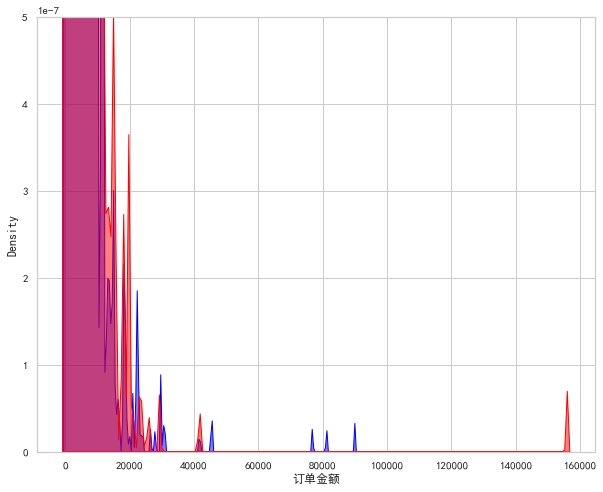

In [438]:
plt.figure(figsize=(10,8))

sns.kdeplot(normal,shade=True,color='blue',alpha=0.5,label='普通交易')
sns.kdeplot(ab,shade=True,color='red',alpha=0.5,label='异常交易')

#sns.set(style='whitegrid',font='simhei')
plt.ylim((0,0.0000005))
plt.show()

In [439]:
#分箱

In [440]:
from sklearn.preprocessing import KBinsDiscretizer as KBD

In [441]:
enc = KBD(n_bins=10,encode='ordinal',strategy='kmeans')

In [442]:
enc = enc.fit(pd.DataFrame(train['订单金额']))

In [446]:
train['金额分箱'] = enc.transform(pd.DataFrame(train['订单金额']))
test['金额分箱'] = enc.transform(pd.DataFrame(test['订单金额']))

In [445]:
train.groupby(['金额分箱'])['订单金额'].min()

金额分箱
0.0         0.5
1.0      1128.0
2.0      3226.0
3.0      6666.0
4.0     12396.0
5.0     20995.0
6.0     41666.0
7.0     76880.0
8.0     89980.0
9.0    155999.0
Name: 订单金额, dtype: float64

In [447]:
dic = dict(train.groupby(['金额分箱'])['订单金额'].mean())

train['分箱均值'] = train['金额分箱'].map(dic)
test['分箱均值'] = test['金额分箱'].map(dic)

In [451]:
train.tail()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,...,省份,省份异常率,商品品类异常率,渠道异常率,下单渠道异常率,用户异常率,商品异常率,品牌异常率,金额分箱,分箱均值
91888,0,4285745040,4,0,7618,2282,19.9,1,1,0,...,26,0.215836,0.174485,0.178876,0.168077,-1.000000,0.288813,0.210780,0.0,154.656019
91889,0,4285745071,9,0,7691,1208,398.0,1,1,0,...,16,0.244307,0.197497,0.178876,0.168077,-1.000000,-1.000000,0.140351,0.0,154.656019
91890,0,4285765029,2,0,5114,732,128.0,1,7,0,...,11,0.220235,0.253153,0.178876,0.398844,0.214286,0.272727,0.317757,0.0,154.656019
91891,0,4285770012,3,0,4550,1618,79.0,1,7,0,...,11,0.220235,0.234682,0.178876,0.398844,0.000000,0.200000,0.329449,0.0,154.656019
91892,0,4285770056,9,0,193,1568,799.0,1,7,0,...,19,0.271540,0.197497,0.178876,0.398844,-1.000000,0.017857,0.194008,0.0,154.656019


In [452]:
ab = train.loc[train['异常标签']==1,'销售数量']
normal = train.loc[train['异常标签']!=1,'销售数量']

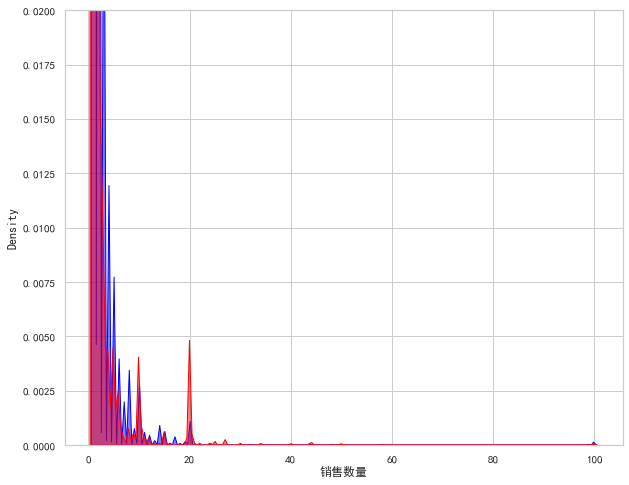

In [456]:
plt.figure(figsize=(10,8))

sns.kdeplot(normal,shade=True,color='blue',alpha=0.5,label='普通交易')
sns.kdeplot(ab,shade=True,color='red',alpha=0.5,label='异常交易')

#sns.set(style='whitegrid',font='simhei')
plt.ylim((0,0.02))
plt.show()

In [457]:
#简单分箱

train['销量分箱'] = 0
test['销量分箱'] = 0
train.loc[train['销售数量']>25,'销量分箱'] = 1
test.loc[test['销售数量']>25,'销量分箱'] = 1

In [458]:
train.head()

,异常标签,订单ID,商品品类,渠道,商品ID,品牌,订单金额,销售数量,下单渠道,支付方式,...,省份异常率,商品品类异常率,渠道异常率,下单渠道异常率,用户异常率,商品异常率,品牌异常率,金额分箱,分箱均值,销量分箱
0,1,4276537082,11,1,12715,1425,19900.0,100,1,0,...,0.210600,0.196977,0.294674,0.168077,0.5,0.333333,0.181818,4.0,15518.920000,1
1,0,4245023523,2,1,15062,1885,100.0,100,1,0,...,0.220235,0.253153,0.294674,0.168077,0.0,0.000000,0.000000,0.0,154.656019,1
2,0,4276537218,11,1,12715,1425,18900.0,100,1,0,...,0.210600,0.196977,0.294674,0.168077,0.5,0.333333,0.181818,4.0,15518.920000,1
3,0,4281111696,2,1,15062,1885,100.0,100,1,0,...,0.220235,0.253153,0.294674,0.168077,0.0,0.000000,0.000000,0.0,154.656019,1
4,0,4284289174,3,1,15199,686,8800.0,100,1,0,...,0.220235,0.234682,0.294674,0.168077,-1.0,0.223140,0.281501,3.0,8956.546269,1


In [459]:
train.to_csv(r'train5.csv')
test.to_csv(r'test5.csv')

# 模型

In [460]:
import sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [462]:
Xtrain = train.iloc[:,1:]
Xtest = test.iloc[:,1:]
ytrain = train.iloc[:,0]
ytest = test.iloc[:,0]

In [463]:
dtrain = xgb.DMatrix(Xtrain,ytrain)
dtest = xgb.DMatrix(Xtest,ytest)

In [465]:
rf = RFC(n_estimators=200,random_state=717)
gbdc = GBC(n_estimators=200,random_state=717)

In [466]:
cv = KFold(n_splits=5,shuffle=True,random_state=717)

In [467]:
result_gbdc_cv = cross_val_score(gbdc,Xtrain,ytrain,cv=cv)

In [468]:
print(result_gbdc_cv.mean())
print(result_gbdc_cv.var())

0.8794576014439113
6.485473999655337e-06


In [469]:
result_rf_cv = cross_val_score(rf,Xtrain,ytrain,cv=cv)

In [470]:
print(result_rf_cv.mean())
print(result_rf_cv.var())

0.8754202624867624
2.2228159039658424e-05


In [471]:
param = {'objective':'binary:logistic',
         'eval_metric':'error',
         'seed':717}
xgbcv = xgb.cv(param,dtrain,num_boost_round=200,nfold=5,seed=717,shuffle=True)

In [472]:
xgbcv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.125690,0.001156,0.127300,0.003996
1,0.124256,0.001478,0.125700,0.003109
2,0.123570,0.001244,0.125233,0.003116
3,0.122278,0.001115,0.123894,0.003030
4,0.121938,0.001135,0.123970,0.003068
...,...,...,...,...
195,0.064510,0.001569,0.124057,0.002164
196,0.064238,0.001627,0.124101,0.002276
197,0.064069,0.001574,0.124101,0.002294
198,0.063949,0.001600,0.124166,0.002297


In [473]:
1 - xgbcv.loc[199,'test-error-mean']

0.8758666

In [474]:
#三个评分均比benchmark高，说明特征工程起到了效果

In [476]:
rf = RFC(n_estimators=200,random_state=717)
gbdc = GBC(n_estimators=200,random_state=717)
cv = KFold(n_splits=5,shuffle=True,random_state=717)

In [477]:
result_gbdc_roc = cross_val_score(gbdc,Xtrain,ytrain,cv=cv,scoring='roc_auc')

In [478]:
print(result_gbdc_roc.mean())
print(result_gbdc_roc.var())

0.9354674798928038
4.149316735748796e-06


In [479]:
result_rf_roc = cross_val_score(rf,Xtrain,ytrain,cv=cv,scoring='roc_auc')

In [480]:
print(result_rf_roc.mean())
print(result_rf_roc.var())

0.9283911070694086
6.1067177178406295e-06


In [481]:
param2 ={'objective':'binary:logistic',
         'eval_metric':'auc',
         'seed':717}
xgb_auc = xgb.cv(param2,dtrain,num_boost_round=200,nfold=5,seed=717,shuffle=True)

In [482]:
xgb_auc.loc[199,'test-auc-mean']

0.9329921999999999

In [483]:
#AUC分数也高于benchmark

In [484]:
#由于调参需要足够的算力，故在此不进行细节调参，直接进行模型融合

In [485]:
rf = RFC(n_estimators=200,random_state=717)
gbdc = GBC(n_estimators=200,random_state=717)
param2 ={'objective':'binary:logistic',
         'eval_metric':'auc',
         'seed':717}

In [486]:
rf = rf.fit(Xtrain,ytrain)
gbdc = gbdc.fit(Xtrain,ytrain)
xgbc = xgb.train(param2,dtrain,num_boost_round=200)

In [487]:
rf_prob_train = rf.predict_proba(Xtrain)
gbdc_prob_train = gbdc.predict_proba(Xtrain)
xgb_prob_train = xgbc.predict(dtrain)

In [490]:
prob_train = pd.concat([pd.DataFrame(rf_prob_train,columns=['rf0','rf1'])
                       ,pd.DataFrame(gbdc_prob_train,columns=['gbc0','gbc1'])
                       ,pd.DataFrame(xgb_prob_train,columns=['xgb1'])]
                      ,axis=1)

In [492]:
prob_train.head()

,rf0,rf1,gbc0,gbc1,xgb1
0,0.305,0.695,0.458639,0.541361,0.538309
1,0.975,0.025,0.998864,0.001136,0.000016
2,0.710,0.290,0.451930,0.548070,0.377959
3,0.970,0.030,0.998733,0.001267,0.000002
4,0.925,0.075,0.897819,0.102181,0.020390


In [493]:
prob_train['xgb0'] = 1 - prob_train['xgb1']

In [495]:
prob_train.loc[:,'0'] = (1/3) * prob_train.loc[:,'rf0'] + (1/3) * prob_train.loc[:,'gbc0'] + (1/3) * prob_train.loc[:,'xgb0']
prob_train.loc[:,'1'] = (1/3) * prob_train.loc[:,'rf1'] + (1/3) * prob_train.loc[:,'gbc1'] + (1/3) * prob_train.loc[:,'xgb1']

In [496]:
prob_train.head()

,rf0,rf1,gbc0,gbc1,xgb1,xgb0,0,1
0,0.305,0.695,0.458639,0.541361,0.538309,0.461691,0.408443,0.591557
1,0.975,0.025,0.998864,0.001136,0.000016,0.999984,0.991283,0.008717
2,0.710,0.290,0.451930,0.548070,0.377959,0.622041,0.594657,0.405343
3,0.970,0.030,0.998733,0.001267,0.000002,0.999998,0.989577,0.010423
4,0.925,0.075,0.897819,0.102181,0.020390,0.979610,0.934143,0.065857


In [498]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [499]:
roc_auc_score(ytrain,prob_train['1'])

0.9926800252068091

In [500]:
ytrain_pred = ((prob_train['1'])>0.5).astype('int')

In [502]:
accuracy_score(ytrain,ytrain_pred)

0.9491691423721067

In [510]:
ytrain_pred = ((prob_train['1'])>0.4).astype('int')
accuracy_score(ytrain,ytrain_pred)

0.9585822641550499

In [511]:
rf_prob_test = rf.predict_proba(Xtest)
gbdc_prob_test = gbdc.predict_proba(Xtest)
xgb_prob_test = xgbc.predict(dtest)

In [512]:
prob_test = pd.concat([pd.DataFrame(rf_prob_test,columns=['rf0','rf1'])
                       ,pd.DataFrame(gbdc_prob_test,columns=['gbc0','gbc1'])
                       ,pd.DataFrame(xgb_prob_test,columns=['xgb1'])]
                      ,axis=1)
prob_test['xgb0'] = 1- prob_test['xgb1']

In [513]:
prob_test.loc[:,'0'] = (1/3) * prob_test.loc[:,'rf0'] + (1/3) * prob_test.loc[:,'gbc0'] + (1/3) * prob_test.loc[:,'xgb0']
prob_test.loc[:,'1'] = (1/3) * prob_test.loc[:,'rf1'] + (1/3) * prob_test.loc[:,'gbc1'] + (1/3) * prob_test.loc[:,'xgb1']

In [514]:
roc_auc_score(ytest,prob_test['1'])

0.8200034755123755

In [515]:
ytest_pred = ((prob_test['1'])>0.4).astype('int')
accuracy_score(ytest,ytest_pred)

0.8204574881312041

In [ ]:
#整个模型处于过拟合的状态，但在业务中可以起到警示作用。